In [1]:
from io import BytesIO
import requests
import pandas as pd
from arcgis.features import FeatureLayer
from arcgis.gis import GIS
from arcgis.mapping import WebMap

In [37]:
from arcgis.gis import GIS
gis = GIS("https://utoronto.maps.arcgis.com",client_id="D6mmWslBBmHA1RuS", verify_cert=False)
print("Successfully logged in as: " + gis.properties.user.username)

Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://utoronto.maps.arcgis.com/sharing/rest/oauth2/authorize?response_type=code&client_id=D6mmWslBBmHA1RuS&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=j6BtTC1QgNsMmsCzeRPeF2zybeAXxI&allow_verification=false
Enter code obtained on signing in using SAML: ········
Successfully logged in as: yangch53_utoronto


<Item title:"World Countries (Generalized)" type:Feature Layer Collection owner:esri_dm>
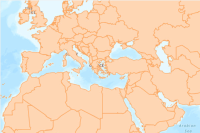

In [25]:
item = gis.content.search("World Countries (Generalized) owner:esri_dm", outside_org=True)[1]
item

In [39]:
provinces_item = gis.content.get("2b93b06dc0dc4e809d3c8db5cb96ba69")

<Item title:"World Countries (Generalized)" type:Feature Layer Collection owner:esri_dm>
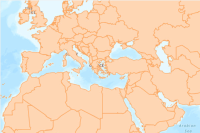

In [40]:
provinces_item

In [44]:
countries_item = gis.content.get("2b93b06dc0dc4e809d3c8db5cb96ba69")
countries_flayer = countries_item.layers[0]
countries_df = countries_flayer.query(as_df=True)
countries_df.columns

Index(['FID', 'COUNTRY', 'ISO', 'COUNTRYAFF', 'AFF_ISO', 'Shape__Area',
       'Shape__Length', 'SHAPE'],
      dtype='object')

In [3]:
item = gis.content.search("World Country Boundaries 2019 owner:esri_dm", outside_org=True)[0]
item.id

'7d721e9b74bf4b16bd43dfe489a5a533'

In [3]:
countries_item = gis.content.get("7d721e9b74bf4b16bd43dfe489a5a533")
countries_flayer = countries_item.layers[1]
countries_df = countries_flayer.query(as_df=True)
countries_df.columns

Index(['OBJECTID', 'FIPS_CNTRY', 'ISO_2DIGIT', 'ISO_3DIGIT', 'NAME',
       'LONG_NAME', 'LOCSHRTNAM', 'LOCLNGNAM', 'CAPITAL', 'COUNTRYAFF',
       'CONTINENT', 'COLORMAP', 'Shape__Area', 'Shape__Length', 'SHAPE'],
      dtype='object')

In [4]:
countries_df

,OBJECTID,FIPS_CNTRY,ISO_2DIGIT,ISO_3DIGIT,NAME,LONG_NAME,LOCSHRTNAM,LOCLNGNAM,CAPITAL,COUNTRYAFF,CONTINENT,COLORMAP,Shape__Area,Shape__Length,SHAPE
0,1,AQ,AS,ASM,American Samoa,Territory of American Samoa,,,Pago Pago,United States,Oceania,2,0.013720,0.600124,"{""rings"": [[[-170.743900004405, -14.3755549521..."
1,2,WQ,UM,UMI,United States Minor Outlying Islands,,,,,United States,Oceania,7,0.000034,0.028875,"{""rings"": [[[-176.461427013962, 0.215282100954..."
2,3,CW,CK,COK,Cook Islands,Cook Islands,,,Avarua,New Zealand,Oceania,6,0.013073,0.980664,"{""rings"": [[[-159.746981979454, -21.2566730188..."
3,4,FP,PF,PYF,French Polynesia,Overseas Lands of French Polynesia,Polynesie Francaise,Pays d'outre-mer de la Polynesie Francaise,Papeete,France,Oceania,4,0.175332,3.930211,"{""rings"": [[[-149.179199963927, -17.8708359110..."
4,5,WQ,UM,UMI,United States Minor Outlying Islands,,,,,United States,Oceania,7,0.000181,0.053030,"{""rings"": [[[-176.63617309949, 0.7902821691390..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,252,WQ,UM,UMI,United States Minor Outlying Islands,,,,,United States,Oceania,7,0.001576,0.150584,"{""rings"": [[[166.627591264617, 19.324582053940..."
252,253,RS,RU,RUS,Russian Federation,Russian Federation,Rossiya,Rossiyskaya Federatsiya,Moscow,Russian Federation,Asia,1,2929.641772,1526.025072,"{""rings"": [[[131.873291294609, 42.956936010485..."
253,254,RS,RU,RUS,Russian Federation,Russian Federation,Rossiya,Rossiyskaya Federatsiya,Moscow,Russian Federation,Europe,1,1.884414,10.262181,"{""rings"": [[[19.6977731761918, 54.479436078740..."
254,255,SP,ES,ESP,Spain,Kingdom of Spain,Espana,Reino de Espana,Madrid,Spain,Europe,7,52.915449,51.724956,"{""rings"": [[[-2.91471773777289, 35.27360912268..."


In [36]:
dir(countries_df)

['CAPITAL',
 'COLORMAP',
 'CONTINENT',
 'COUNTRYAFF',
 'FIPS_CNTRY',
 'ISO_2DIGIT',
 'ISO_3DIGIT',
 'LOCLNGNAM',
 'LOCSHRTNAM',
 'LONG_NAME',
 'NAME',
 'OBJECTID',
 'SHAPE',
 'Shape__Area',
 'Shape__Length',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mo

In [6]:
world_covid_df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

In [7]:
countries_covid_df = world_covid_df.copy(deep=True)

In [13]:
world_covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220100,ZWE,Africa,Zimbabwe,2022-09-25,257340.0,22.0,49.143,5599.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220101,ZWE,Africa,Zimbabwe,2022-09-26,257342.0,2.0,36.000,5599.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220102,ZWE,Africa,Zimbabwe,2022-09-27,257376.0,34.0,31.429,5599.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220103,ZWE,Africa,Zimbabwe,2022-09-28,257409.0,33.0,36.143,5602.0,3.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [10]:
slected_date_world_df = world_covid_df[world_covid_df["date"] == "2022-02-28"]

In [15]:
world_covid_merged_df = pd.merge(countries_df, slected_date_world_df, left_on = "ISO_3DIGIT", right_on='iso_code', how="left")

In [16]:
world_covid_merged_df

,OBJECTID,FIPS_CNTRY,ISO_2DIGIT,ISO_3DIGIT,NAME,LONG_NAME,LOCSHRTNAM,LOCLNGNAM,CAPITAL,COUNTRYAFF,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,1,AQ,AS,ASM,American Samoa,Territory of American Samoa,,,Pago Pago,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,WQ,UM,UMI,United States Minor Outlying Islands,,,,,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,CW,CK,COK,Cook Islands,Cook Islands,,,Avarua,New Zealand,...,NaN,NaN,NaN,NaN,76.25,NaN,NaN,NaN,NaN,NaN
3,4,FP,PF,PYF,French Polynesia,Overseas Lands of French Polynesia,Polynesie Francaise,Pays d'outre-mer de la Polynesie Francaise,Papeete,France,...,NaN,NaN,NaN,NaN,77.66,NaN,NaN,NaN,NaN,NaN
4,5,WQ,UM,UMI,United States Minor Outlying Islands,,,,,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,252,WQ,UM,UMI,United States Minor Outlying Islands,,,,,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,253,RS,RU,RUS,Russian Federation,Russian Federation,Rossiya,Rossiyskaya Federatsiya,Moscow,Russian Federation,...,23.4,58.3,NaN,8.05,72.58,0.824,1163660.5,30.59,37.31,8019.561724
253,254,RS,RU,RUS,Russian Federation,Russian Federation,Rossiya,Rossiyskaya Federatsiya,Moscow,Russian Federation,...,23.4,58.3,NaN,8.05,72.58,0.824,1163660.5,30.59,37.31,8019.561724
254,255,SP,ES,ESP,Spain,Kingdom of Spain,Espana,Reino de Espana,Madrid,Spain,...,27.4,31.4,NaN,2.97,83.56,0.904,NaN,NaN,NaN,NaN


In [30]:
merged_col = countries_df.columns.to_list()
merged_col.append("total_cases")

In [32]:
world_covid_merged_df[merged_col]

,OBJECTID,FIPS_CNTRY,ISO_2DIGIT,ISO_3DIGIT,NAME,LONG_NAME,LOCSHRTNAM,LOCLNGNAM,CAPITAL,COUNTRYAFF,CONTINENT,COLORMAP,Shape__Area,Shape__Length,SHAPE,total_cases
0,1,AQ,AS,ASM,American Samoa,Territory of American Samoa,,,Pago Pago,United States,Oceania,2,0.013720,0.600124,"{""rings"": [[[-170.743900004405, -14.3755549521...",NaN
1,2,WQ,UM,UMI,United States Minor Outlying Islands,,,,,United States,Oceania,7,0.000034,0.028875,"{""rings"": [[[-176.461427013962, 0.215282100954...",NaN
2,3,CW,CK,COK,Cook Islands,Cook Islands,,,Avarua,New Zealand,Oceania,6,0.013073,0.980664,"{""rings"": [[[-159.746981979454, -21.2566730188...",10.0
3,4,FP,PF,PYF,French Polynesia,Overseas Lands of French Polynesia,Polynesie Francaise,Pays d'outre-mer de la Polynesie Francaise,Papeete,France,Oceania,4,0.175332,3.930211,"{""rings"": [[[-149.179199963927, -17.8708359110...",66699.0
4,5,WQ,UM,UMI,United States Minor Outlying Islands,,,,,United States,Oceania,7,0.000181,0.053030,"{""rings"": [[[-176.63617309949, 0.7902821691390...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,252,WQ,UM,UMI,United States Minor Outlying Islands,,,,,United States,Oceania,7,0.001576,0.150584,"{""rings"": [[[166.627591264617, 19.324582053940...",NaN
252,253,RS,RU,RUS,Russian Federation,Russian Federation,Rossiya,Rossiyskaya Federatsiya,Moscow,Russian Federation,Asia,1,2929.641772,1526.025072,"{""rings"": [[[131.873291294609, 42.956936010485...",16161596.0
253,254,RS,RU,RUS,Russian Federation,Russian Federation,Rossiya,Rossiyskaya Federatsiya,Moscow,Russian Federation,Europe,1,1.884414,10.262181,"{""rings"": [[[19.6977731761918, 54.479436078740...",16161596.0
254,255,SP,ES,ESP,Spain,Kingdom of Spain,Espana,Reino de Espana,Madrid,Spain,Europe,7,52.915449,51.724956,"{""rings"": [[[-2.91471773777289, 35.27360912268...",10977524.0


In [44]:
map1 = gis.map('Canada', zoomlevel=4)
map1

MapView(layout=Layout(height='400px', width='100%'))

In [45]:
map1.add_layer(fl,   { "type": "FeatureLayer",
                       "renderer":"ClassedSizeRenderer",
                       "field_name":"total_cases"})

In [46]:
ports_fc = gis.content.import_data(world_covid_merged_df[merged_col])
ports_fc

<Item title:"11d2dbbbbb1f4534bb4cb7588fc35309" type:Feature Layer Collection owner:yangch53_utoronto>

In [47]:
ports_fc.id

'07c8a42c410e450aa2c5a25e1bff71d5'

In [51]:
ports_fc.properties

In [50]:
dir(ports_fc)

['_RELATIONSHIP_DIRECTIONS',
 '_RELATIONSHIP_TYPES',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_publish_status',
 '_create_proxy',
 '_delete_proxy',
 '_depend',
 '_get_icon',
 '_get_nbs_server',
 '_gis',
 '_has_layers',
 '_hydrate',
 '_hydrated',
 '_is_notebook',
 '_populate_layers',
 '_portal',
 '_repr_html_',
 '_snapeshots',
 '_uid',
 '_user_id',
 '_ux_item_type',
 '_validate_url',
 '_workdir',
 'access',
 'accessInformation',
 'add_comment',
 'add_relationship',
 'advancedSett

In [48]:
import json
ports_fc_dict = dict(ports_fc.properties)
ports_json = json.dumps({"featureCollection": {"layers": [ports_fc_dict]}})

TypeError: 'NoneType' object is not iterable

In [ ]:
ports_item_properties = {'title': 'World_Total_Covid_Cases',
                        'tags': 'arcgis python api, pandas, csv',
                        'text':ports_json,
                        'type':'Feature Collection'}
ports_item = gis.content.add(ports_item_properties)
ports_item

In [40]:
src_url = "https://services1.arcgis.com/9NvE8jKNWWlDGsUJ/arcgis/rest/services/a0ec7c/FeatureServer"

In [41]:
fl = FeatureLayer(url=src_url)

In [43]:
map1

TypeError: 'Response' object is not subscriptable

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)